#Posttest 2
##Nama  : Sahriah
##NIM   : 2109106087
##Kelas : C1'22

##Import Library





In [1]:
import pandas as pd

##Import Dataset ke dalam Dataframe

In [2]:
heart = pd.read_csv ('https://raw.githubusercontent.com/sahriahs/Praktikum_KB/refs/heads/master/Heart%20Failure%20Prediction%20Dataset/heart.csv')

##Menampilkan Banyak Baris dan Kolom dari Dataset

In [3]:
heart.shape

(918, 12)

##Menampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.

In [4]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Menampilkan 10 record pertama dari dataset dengan attribute bertipe angka.

In [5]:
num = heart.select_dtypes(include=['int64','float64']).columns

heart[num].head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
5,39,120,339,0,170,0.0,0
6,45,130,237,0,170,0.0,0
7,54,110,208,0,142,0.0,0
8,37,140,207,0,130,1.5,1
9,48,120,284,0,120,0.0,0


##Menampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

In [6]:
heart[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


##Menampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama)

In [7]:
obj = heart.select_dtypes(include=['object']).columns

for i in obj:
  print(heart[i].value_counts())
  print("\n")

Sex
M    725
F    193
Name: count, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




##Visualisasi dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

###- Scatter Plot
Scatter plot antara MaxHR dan Oldpeak untuk melihat apakah ada pola yang menunjukkan hubungan antara detak jantung maksimum dan penurunan ST.

Note: Segmen ST adalah bagian dari grafik EKG yang menggambarkan fase pemulihan otot jantung setelah kontraksi.

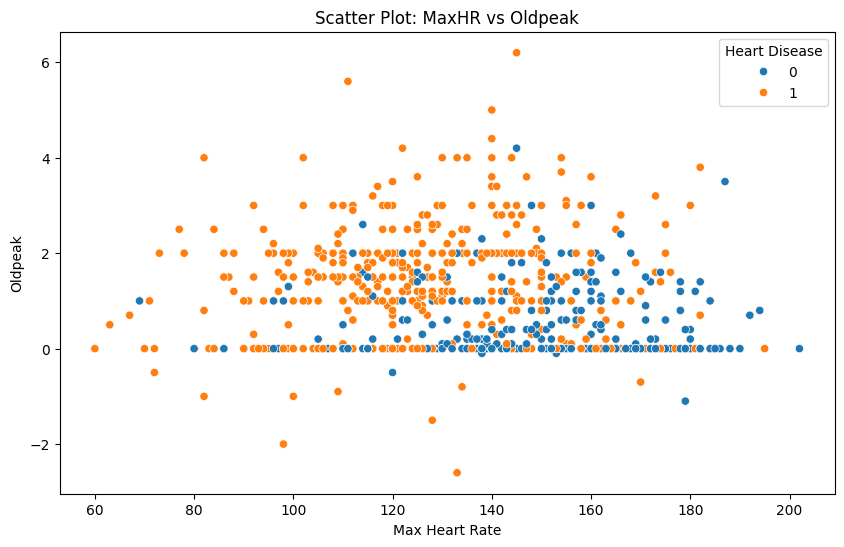

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart, x='MaxHR', y='Oldpeak', hue='HeartDisease')
plt.title('Scatter Plot: MaxHR vs Oldpeak')
plt.xlabel('Max Heart Rate')
plt.ylabel('Oldpeak')
plt.legend(title='Heart Disease')
plt.show()

###- Box Plot
Box plot untuk Cholesterol yang dibedakan berdasarkan apakah individu memiliki penyakit jantung atau tidak.

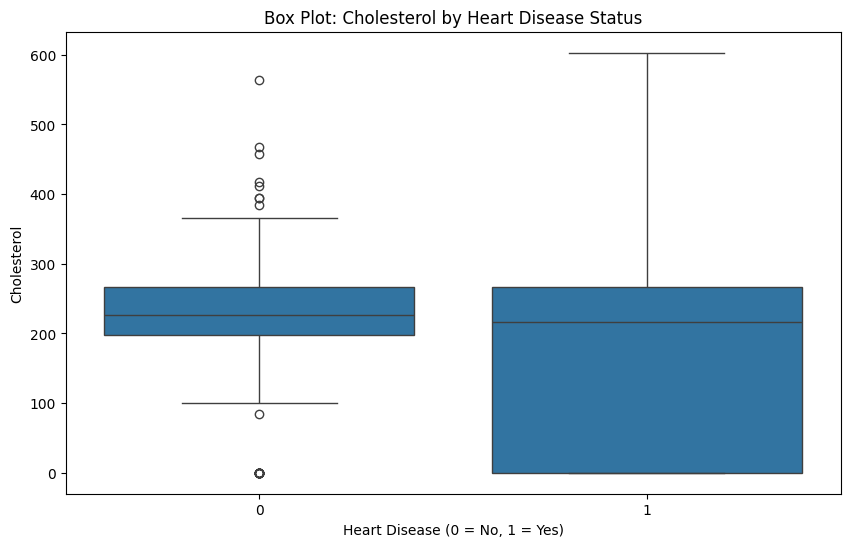

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart, x='HeartDisease', y='Cholesterol')
plt.title('Box Plot: Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.show()

###- Histogram
Menampilkan distribusi usia individu dalam dataset.

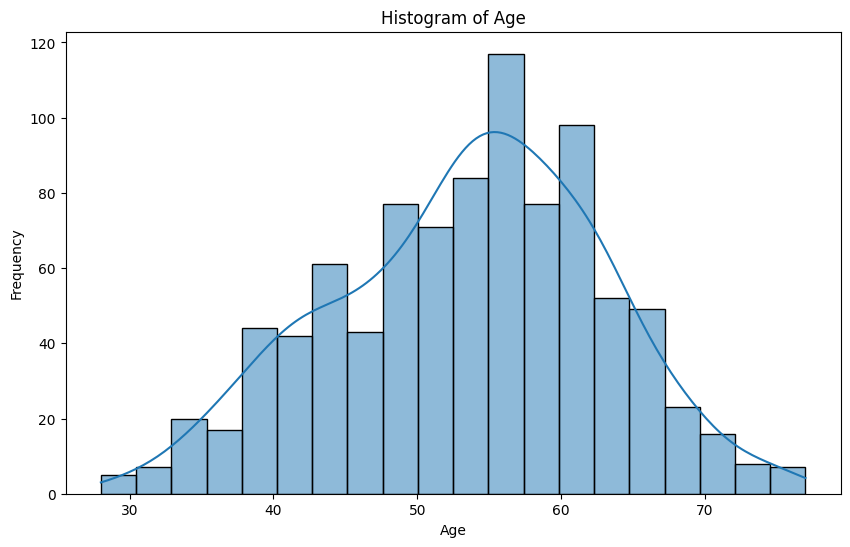

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(heart['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###- Pairplot
Menampilkan scatter plot untuk semua pasangan variabel, dikelompokkan berdasarkan status penyakit jantung.

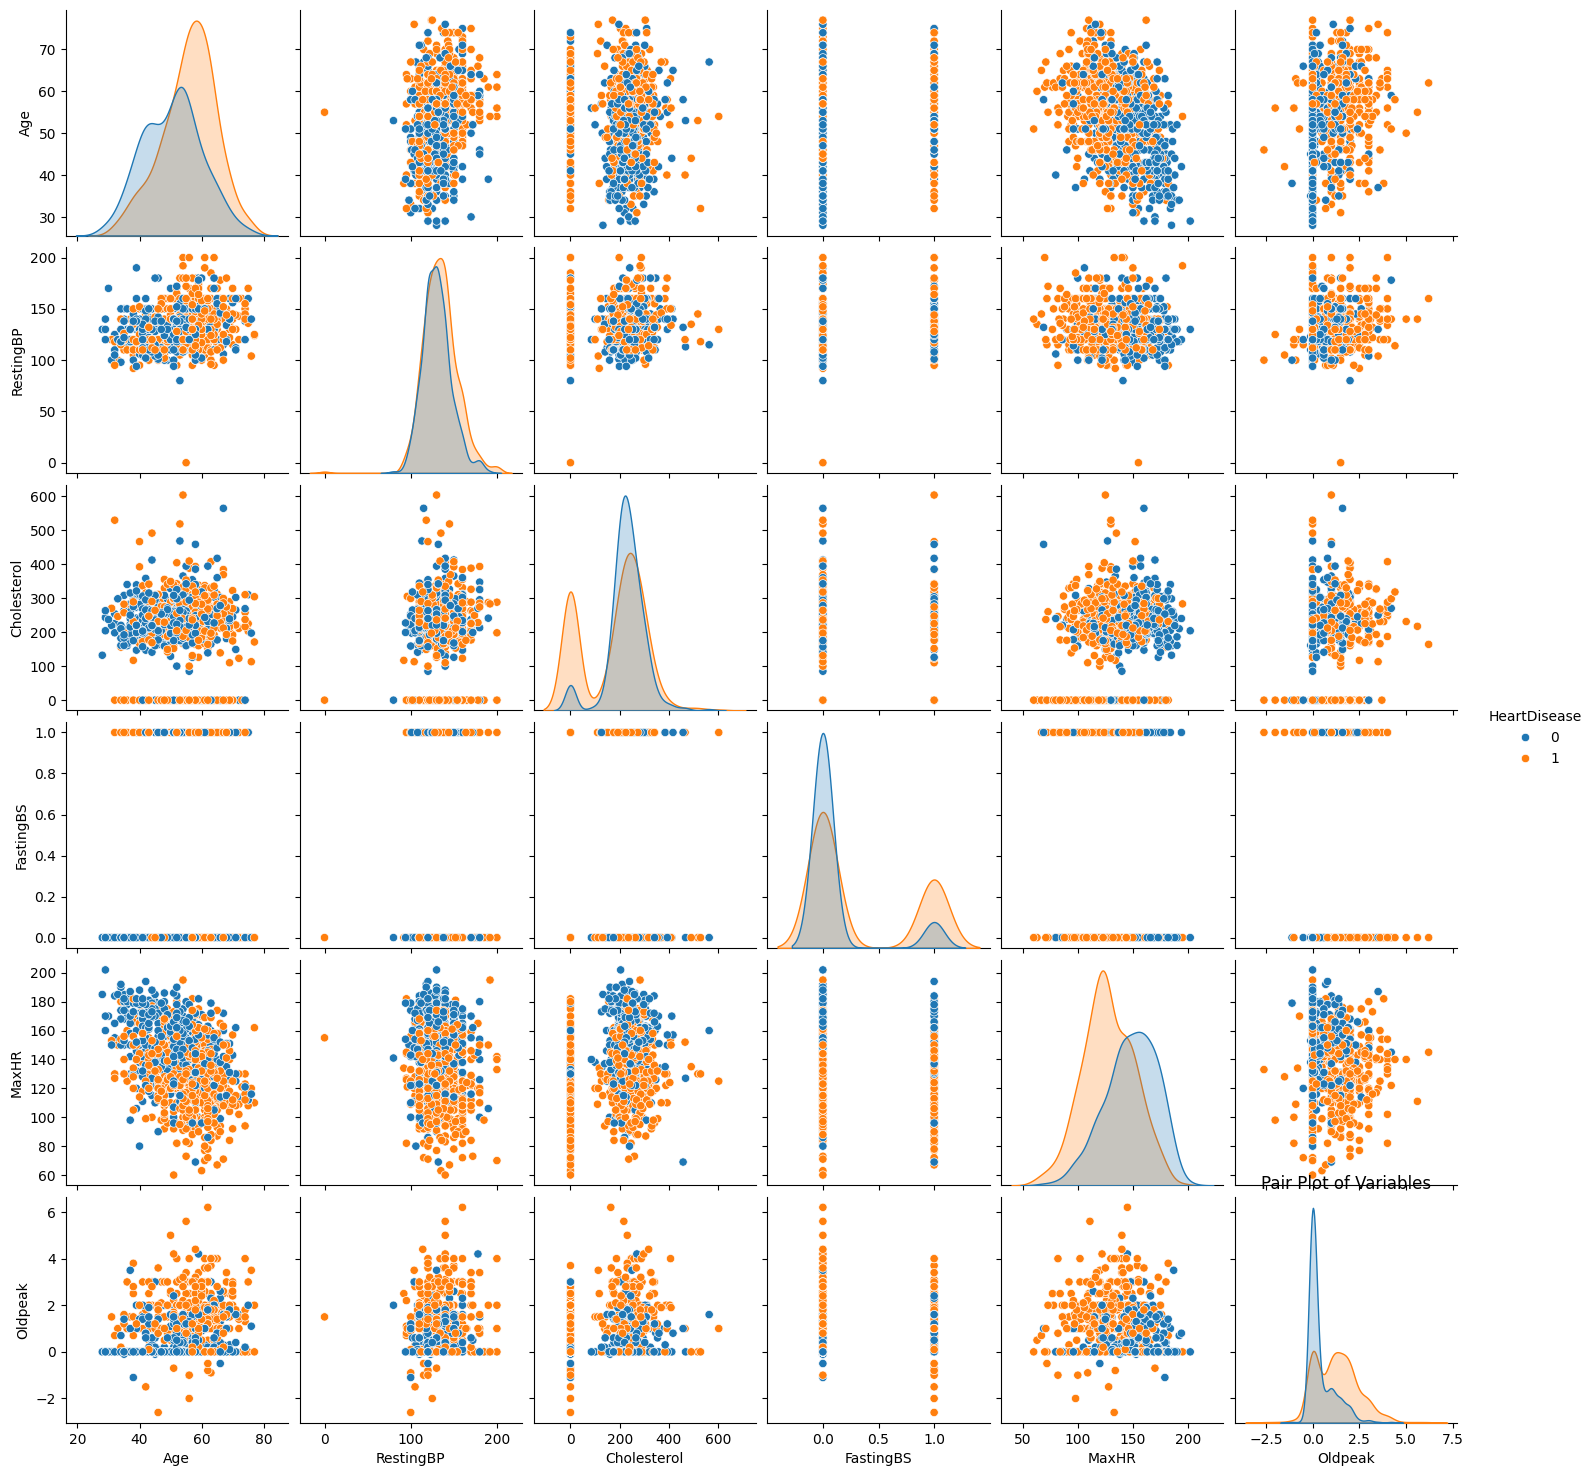

In [16]:
sns.pairplot(heart, hue='HeartDisease')
plt.title('Pair Plot of Variables')
plt.show()

###- Count Plaot
Menghitung dan menampilkan jumlah individu berdasarkan tipe nyeri dada.

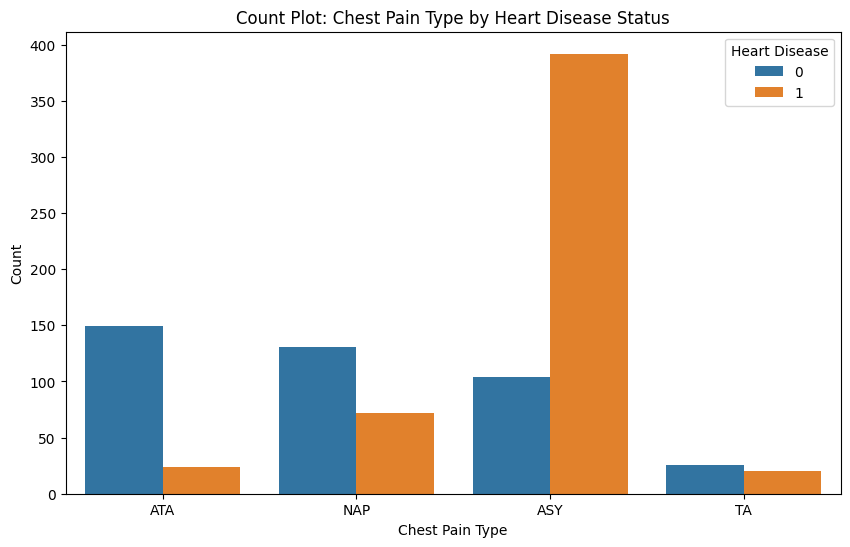

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=heart, x='ChestPainType', hue='HeartDisease')
plt.title('Count Plot: Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

##Menampilkan korelasi dataset menggunakan heatmap.

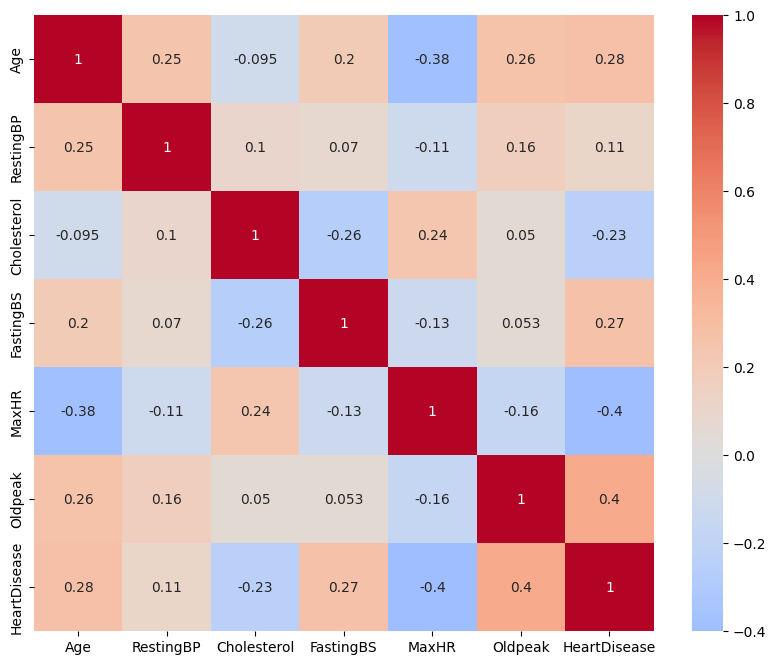

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart.corr(numeric_only=True), cmap='coolwarm', annot=True, center=0)
plt.show()

##Menyimpan Dataset ke File CSV

In [22]:
heart.to_csv('heart_posttest2.csv', index=False)